In [13]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = r'C:\Users\kalya\OneDrive - University of Illinois at Chicago\!UIC\!Semesters\3rd Sem\CS 583 Data Mining and Text Mining\Research Project\Data'


In [3]:

trainFile = os.path.join(data_path,"training-Obama-Romney-tweets.xlsx")
obama_data = pd.read_excel(trainFile, sheet_name = 'Obama', header = None, skiprows =[0,1], usecols= [3,4], names =['Doc Text', 'Sentiment'])
romney_data = pd.read_excel(trainFile, sheet_name = 'Romney', header = None, skiprows =[0,1], usecols= [3,4], names =['Doc Text', 'Sentiment'])



In [4]:
obama_data.head()

,Doc Text,Sentiment
0,"Kirkpatrick, who wore a baseball cap embroider...",0
1,Question: If <e>Romney</e> and <e>Obama</e> ha...,2
2,#<e>obama</e> debates that Cracker Ass Cracker...,1
3,RT @davewiner Slate: Blame <e>Obama</e> for fo...,2
4,@Hollivan @hereistheanswer Youre missing the ...,0


In [5]:
romney_data.head()

,Doc Text,Sentiment
0,Insidious!<e>Mitt Romney</e>'s Bain Helped Phi...,-1
1,Senior <e>Romney</e> Advisor Claims <e>Obama</...,2
2,.@WardBrenda @shortwave8669 @allanbourdius you...,-1
3,<e>Mitt Romney</e> still doesn't <a>believe</a...,-1
4,<e>Romney</e>'s <a>tax plan</a> deserves a 2nd...,-1


## Removing datapoints with mixed sentiment

In [6]:
obama_data = obama_data[obama_data['Sentiment'] .isin((1,-1,0))]
obama_data.head()

,Doc Text,Sentiment
0,"Kirkpatrick, who wore a baseball cap embroider...",0
2,#<e>obama</e> debates that Cracker Ass Cracker...,1
4,@Hollivan @hereistheanswer Youre missing the ...,0
6,I was raised as a Democrat left the party yea...,-1
7,The <e>Obama camp</e> can't afford to lower ex...,0


In [7]:
romney_data = romney_data[romney_data['Sentiment'] .isin((1,-1,0))]
romney_data.head()

,Doc Text,Sentiment
0,Insidious!<e>Mitt Romney</e>'s Bain Helped Phi...,-1
2,.@WardBrenda @shortwave8669 @allanbourdius you...,-1
3,<e>Mitt Romney</e> still doesn't <a>believe</a...,-1
4,<e>Romney</e>'s <a>tax plan</a> deserves a 2nd...,-1
5,Hope <e>Romney</e> debate prepped w/ the same ...,1


In [8]:
obama_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5471 entries, 0 to 7195
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Doc Text   5470 non-null   object
 1   Sentiment  5471 non-null   object
dtypes: object(2)
memory usage: 128.2+ KB


In [9]:
romney_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5648 entries, 0 to 7199
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Doc Text   5648 non-null   object
 1   Sentiment  5648 non-null   object
dtypes: object(2)
memory usage: 132.4+ KB


### Dropping Missing Values

In [10]:
obama_data = obama_data.dropna()
romney_data = romney_data.dropna()

In [11]:
obama_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5470 entries, 0 to 7195
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Doc Text   5470 non-null   object
 1   Sentiment  5470 non-null   object
dtypes: object(2)
memory usage: 128.2+ KB


## Data Analysis

In [12]:
romney_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5648 entries, 0 to 7199
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Doc Text   5648 non-null   object
 1   Sentiment  5648 non-null   object
dtypes: object(2)
memory usage: 132.4+ KB


In [19]:
romney_data['Sentiment'].value_counts()

-1    2893
 0    1680
 1    1075
Name: Sentiment, dtype: int64

In [21]:
romney_data['Sentiment'].unique()

array([-1, 1, 0], dtype=object)

In [18]:
sizes = list(romney_data['Sentiment'].value_counts())
sizes

[2893, 1680, 1075]

In [41]:
def DA (obama_data,romney_data):
    labels = ['Negative','Neutral','Positive']
    sizes_obama = list(obama_data['Sentiment'].value_counts())
    sizes_romney = list(romney_data['Sentiment'].value_counts())
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))
    ax1.pie(sizes_obama, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.title.set_text('Obama class distibution')

    ax2.pie(sizes_romney, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
    ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax2.title.set_text('Romney class distibution')
    plt.show()
    
    

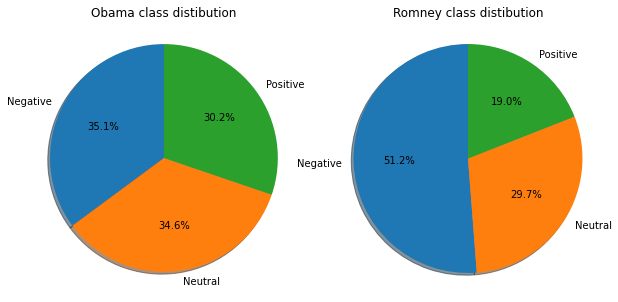

In [42]:
DA (obama_data,romney_data)